# Author: Talha Ali Khan

# Project: Image Classifier

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import skimage.data
from skimage import color, data, feature, exposure
from skimage.transform import rescale, resize
from skimage.feature import hog
import pickle

In [2]:
Xtr=np.loadtxt("TrainData.csv")
Ytr=np.loadtxt("TrainLabels.csv")
Xts=np.loadtxt("TestData.csv")

In [3]:
# plt.imshow(Xtr[10].reshape([28,28]))

# HOG Features of my image

In [4]:
img = mpimg.imread('my_img.JPG')
resized_img = resize(img, (128,64)) 

fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, 
                    multichannel=True)

C:\Users\Sobo Tech\AppData\Local\Programs\Python\Python38\lib\site-packages\skimage\_shared\utils.py:338: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0.Please use `channel_axis` instead.
  return func(*args, **kwargs)


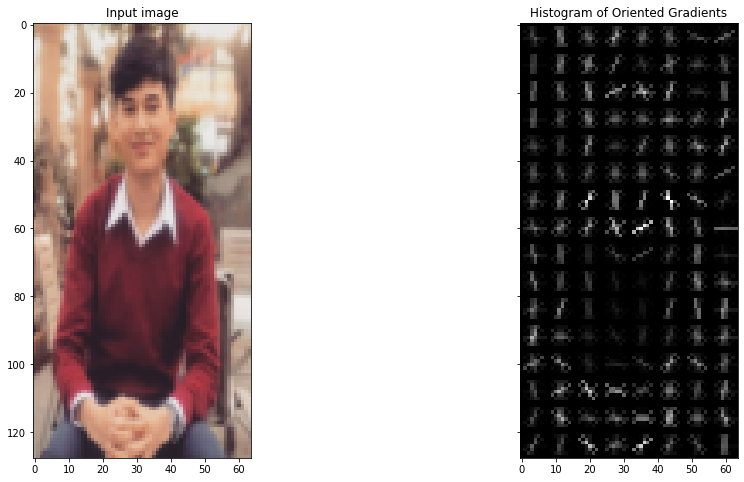

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex = True, sharey = True)

ax1.imshow(resized_img, cmap = plt.cm.gray)
ax1.set_title("Input image")

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range = (0, 10))

ax2.imshow(hog_image_rescaled, cmap = plt.cm.gray)
ax2.set_title("Histogram of Oriented Gradients")

plt.show()

# Plotting an Image from dataset

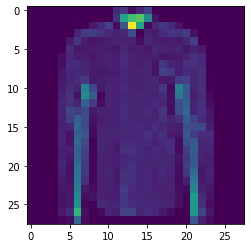

In [6]:
plt.imshow(Xtr[2650].reshape([28,28]))

# Plotting Original image and Extracted Features

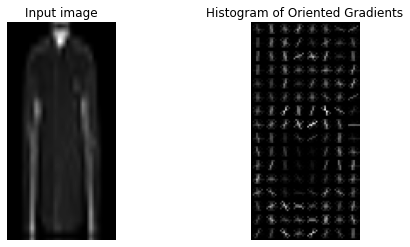

In [7]:
new_p = Xtr[2650].reshape([28,28])
resized_img = resize(new_p, (128,64))     
new_p = resized_img

# fd, hog_image = hog(new_p, orientations=8, pixels_per_cell = (4,4), cells_per_block = (1,1),
#                     visualize=True, multichannel=None)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 4), sharex = True, sharey = True)

ax1.axis('off')
ax1.imshow(new_p, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better diplay
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title("Histogram of Oriented Gradients")
plt.show()

# Extracting Features from entire Dataset

In [8]:
x1 = []
for i in enumerate(Xts):      
    new_p = Xts[i[0]].reshape([28,28])
#     resized_img = resize(new_p, (128,64)) 
    resized_img = new_p 
#     fd, hog_image = hog(resized_img, orientations=8, pixels_per_cell = (4,4), cells_per_block = (1,1), 
#                         visualize=True, multichannel=None)
    x1.append(fd)         

In [9]:
x, y = [], []
for i in enumerate(Xtr):      
    new_p = Xtr[i[0]].reshape([28,28])
#     resized_img = resize(new_p, (128,64))
    resized_img = new_p
#     fd, hog_image = hog(resized_img, orientations=8, pixels_per_cell = (4,4), cells_per_block = (1,1), 
#                         visualize=True, multichannel=None)
    x.append(fd)
    y.append(Ytr[i[0]])            

In [10]:
X = np.array(x)
Y = np.array(y)

X1 = np.array(x1)

# Loading and Splitting

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15, random_state = 42)

# Training Model with Classifier and Calculating Accuracy

## Naive_Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

# save model to disk
pickle.dump(model, open("model.csv", 'wb'))

In [13]:
# load the model from disk
# loaded_model = pickle.load(open("model.csv", 'rb'))

In [14]:
y_model = model.predict(X_test)

# TestDataPredictions = model.predict(Xts)
TestDataPredictions = model.predict(X1)
np.savetxt("TestDataPredictions.csv", TestDataPredictions, delimiter=",")

### Accuracy

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv = 5)

array([0.49708333, 0.49666667, 0.49666667, 0.49666667, 0.49666667])

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model) * 100

49.333333333333336

## Decision Tree 

In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
y_model = clf.predict(X_test)
# score(X, Y)

### Accuracy

In [18]:
cross_val_score(clf, X, y, cv = 5)

array([0.50291667, 0.50333333, 0.50333333, 0.50333333, 0.50333333])

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model) * 100

50.66666666666667

SVM

In [20]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X_train, y_train)

y_model = model.predict(X_test)

In [21]:
# TestDataPredictions = model.predict(X1)
# np.savetxt("TestDataPredictions.csv", TestDataPredictions, delimiter=",")

In [22]:
# save model to disk
# pickle.dump(model, open("TestDataPredictions.csv", 'wb'))
# load the model from disk
# loaded_model = pickle.load(open("TestDataPredictions.csv", 'rb'))

Accuracy

In [23]:
# from sklearn.model_selection import cross_val_score
# cross_val_score(model, X, Y, cv = 5)

In [24]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_model) * 100